In [200]:
import numpy as np
import torch

In [201]:
import importlib, project_utils
importlib.reload(project_utils)

<module 'project_utils' from '/Users/adipistiner/PycharmProjects/dl-assignment-3/project_utils.py'>

# uploading data + splitting to train and test

In [134]:
import numpy as np
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X.values
y = y.astype(int).values

print(X.shape)
print(y.shape)

X = ((X / 255.) - .5) * 2

(70000, 784)
(70000,)


In [135]:
from sklearn.model_selection import train_test_split

# Required split: 70% train_full, 30% test
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.30, random_state=123, stratify=y
)

# 10% Validation split (out of  the 70% train)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.10, random_state=123, stratify=y_train_full
)

print("Train:", X_train.shape, "Valid:", X_valid.shape, "Test:", X_test.shape)


Train: (44100, 784) Valid: (4900, 784) Test: (21000, 784)


In [136]:
#global hyperparams for the models
np.random.seed(123)

minibatch_size = 100
learning_rate = 0.1


===============================
MODEL 1 — Original ch11 (1 hidden layer)
===============================

In [202]:
from project_utils import NeuralNetMLP, train, macro_auc_ovr

In [203]:
epochs_1h = 50

model_1h = NeuralNetMLP(
    num_features=784,
    num_hidden=50,
    num_classes=10
)

loss_1h, train_acc_1h, valid_acc_1h = train(
    model_1h,
    X_train, y_train,
    X_valid, y_valid,
    num_epochs=epochs_1h,
    learning_rate=learning_rate,
    minibatch_size=minibatch_size
)

[1H] Epoch: 001/050 | Train MSE: 0.06 | Train Acc: 0.72% | Valid Acc: 0.73%
[1H] Epoch: 010/050 | Train MSE: 0.02 | Train Acc: 0.92% | Valid Acc: 0.91%
[1H] Epoch: 020/050 | Train MSE: 0.01 | Train Acc: 0.93% | Valid Acc: 0.93%
[1H] Epoch: 030/050 | Train MSE: 0.01 | Train Acc: 0.94% | Valid Acc: 0.94%
[1H] Epoch: 040/050 | Train MSE: 0.01 | Train Acc: 0.95% | Valid Acc: 0.94%
[1H] Epoch: 050/050 | Train MSE: 0.01 | Train Acc: 0.95% | Valid Acc: 0.94%


In [204]:
#evaluate on test:
_, probas_1h = model_1h.forward(X_test)
pred_1h = np.argmax(probas_1h, axis=1)

test_acc_1h = (pred_1h == y_test).mean()
test_auc_1h = macro_auc_ovr(y_test, probas_1h)

print(f"[1-hidden] Test Acc={test_acc_1h:.4f} | Macro-AUC={test_auc_1h:.4f}")


[1-hidden] Test Acc=0.9434 | Macro-AUC=0.9921


===============================
MODEL 2 — Revised ch11 (2 hidden layers)
===============================

In [205]:
from project_utils import NeuralNetMLP2Hidden, train_2hidden

In [206]:
epochs_2h = 50

model_2h = NeuralNetMLP2Hidden(
    num_features=784,
    num_hidden1=50,
    num_hidden2=50,
    num_classes=10
)

np.random.seed(123)
loss_2h, train_acc_2h, valid_acc_2h = train_2hidden(
    model_2h,
    X_train, y_train,
    X_valid, y_valid,
    num_epochs=epochs_2h,
    learning_rate=learning_rate,
    minibatch_size=minibatch_size
)


[2H] Epoch: 001/050 | Train MSE: 0.09 | Train Acc: 17.56% | Valid Acc: 17.65%
[2H] Epoch: 010/050 | Train MSE: 0.02 | Train Acc: 87.78% | Valid Acc: 88.06%
[2H] Epoch: 020/050 | Train MSE: 0.01 | Train Acc: 91.78% | Valid Acc: 91.39%
[2H] Epoch: 030/050 | Train MSE: 0.01 | Train Acc: 93.45% | Valid Acc: 92.82%
[2H] Epoch: 040/050 | Train MSE: 0.01 | Train Acc: 94.63% | Valid Acc: 94.00%
[2H] Epoch: 050/050 | Train MSE: 0.01 | Train Acc: 95.41% | Valid Acc: 94.57%


In [207]:
#evaluate on test
_, _, probas_2h = model_2h.forward(X_test)
pred_2h = np.argmax(probas_2h, axis=1)

test_acc_2h = (pred_2h == y_test).mean()
test_auc_2h = macro_auc_ovr(y_test, probas_2h)

print(f"[2-hidden] Test Accuracy={test_acc_2h:.4f} | Macro-AUC={test_auc_2h:.4f}")


[2-hidden] Test Accuracy=0.9429 | Macro-AUC=0.9928


===============================
MODEL 3 — Framework ANN (PyTorch)
===============================

In [161]:
from project_utils import train_torch_mse_softmax

torch_model, val_acc_torch, val_auc_torch, torch_train_acc_hist, torch_valid_acc_hist, torch_probas_valid = train_torch_mse_softmax(
    X_train, y_train,          
    X_valid, y_valid,          # evaluate per-epoch on validation set
    lr=0.1,
    epochs=50,
    batch_size=100
)

print(f"[PyTorch ANN] Validation Acc={val_acc_torch:.4f} | Macro-AUC={val_auc_torch:.4f}")

[PyTorch-MSE] Epoch 001/050 | Train Acc: 11.68% | Test Acc: 11.82%
[PyTorch-MSE] Epoch 010/050 | Train Acc: 23.87% | Test Acc: 23.69%
[PyTorch-MSE] Epoch 020/050 | Train Acc: 21.56% | Test Acc: 21.53%
[PyTorch-MSE] Epoch 030/050 | Train Acc: 47.72% | Test Acc: 47.73%
[PyTorch-MSE] Epoch 040/050 | Train Acc: 75.53% | Test Acc: 75.61%
[PyTorch-MSE] Epoch 050/050 | Train Acc: 84.83% | Test Acc: 84.43%
[PyTorch ANN] Validation Acc=0.8443 | Macro-AUC=0.9807


In [154]:
# PyTorch test evaluation

# forward pass on test
with torch.no_grad():
    test_out = torch_model(torch.tensor(X_test, dtype=torch.float32))

probas_torch_test = np.array(test_out.detach().cpu().tolist())
pred_torch_test = np.argmax(probas_torch_test, axis=1)

test_acc_torch = (pred_torch_test == y_test).mean()
test_auc_torch = macro_auc_ovr(y_test, probas_torch_test)

print(f"[PyTorch ANN] Test Accuracy={test_acc_torch:.4f} | Macro-AUC={test_auc_torch:.4f}")


[PyTorch ANN] Test Accuracy=0.8488 | Macro-AUC=0.9801


===============================
FINAL COMPARISON (Q4)
===============================

In [208]:
print("\n=== FINAL COMPARISON (70/30 TEST SET) ===")
print(f"1-hidden : Accuracy={test_acc_1h:.4f} | Macro-AUC={test_auc_1h:.4f}")
print(f"2-hidden : Accuracy={test_acc_2h:.4f} | Macro-AUC={test_auc_2h:.4f}")
print(f"PyTorch ANN : Accuracy={test_acc_torch:.4f} | Macro-AUC={test_auc_torch:.4f}")



=== FINAL COMPARISON (70/30 TEST SET) ===
1-hidden : Accuracy=0.9434 | Macro-AUC=0.9921
2-hidden : Accuracy=0.9429 | Macro-AUC=0.9928
PyTorch ANN : Accuracy=0.8488 | Macro-AUC=0.9801


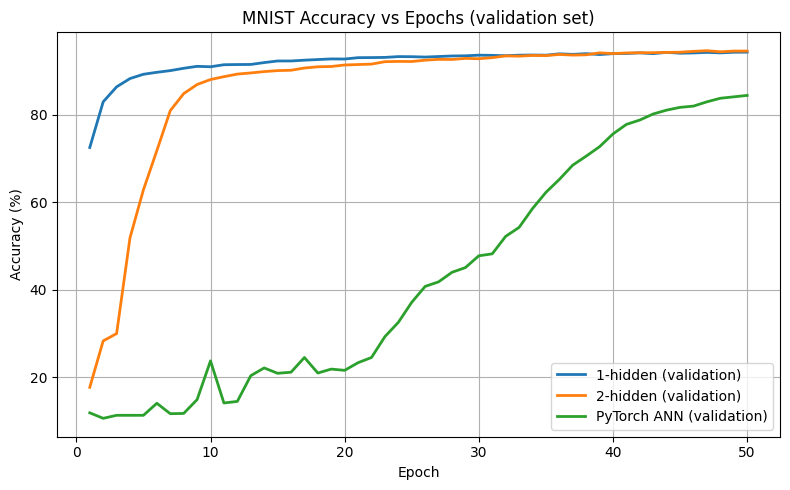

In [209]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

# Scratch – 1 hidden layer
plt.plot(
    range(1, len(valid_acc_1h) + 1),
    valid_acc_1h,
    label="1-hidden (validation)",
    linewidth=2
)

# Scratch – 2 hidden layers
plt.plot(
    range(1, len(valid_acc_2h) + 1),
    valid_acc_2h,
    label="2-hidden (validation)",
    linewidth=2
)

# PyTorch ANN
plt.plot(
    range(1, len(torch_valid_acc_hist) + 1),
    torch_valid_acc_hist,
    label="PyTorch ANN (validation)",
    linewidth=2
)

plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("MNIST Accuracy vs Epochs (validation set)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
